In [1]:
import numpy as np
import scipy as sp
import math
import random
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

p = 0.1
b = np.array([2,8,12,2,8,12,8,12])
t1 = np.array([1,1,2])
c = 8
t2 = np.array([4,6])
d = np.array([6,10])
s = 200
r = 40

#np.random.seed(0)
n = 100  
size = (n,)  
randpart1 = np.random.binomial(1, p, size)
randpart2 = np.random.binomial(1, p, size)
randpart3 = np.random.binomial(1, p, size)

def  stage1(n1,n2,n3,plan):
    pay = -b[0]*len(n1) - b[1]*len(n2) - b[2]*len(n3) - plan[0]*t1[0]*len(n1) - plan[1]*t1[1]*len(n2) - plan[2]*t1[2]*len(n3)
    num1 = len(n1) - np.sum(n1==1)*plan[0]
    num2 = len(n2) - np.sum(n2==1)*plan[1]
    num3 = len(n3) - np.sum(n3==1)*plan[2]
    num_half = min([num1,num2,num3])
    pay = pay - num_half*c
    return num_half, pay
###上面是3到1的半成品过程，半成品中可能混杂有次品

def  stage1_3(n2,n3,plan):
    pay = - b[1]*len(n2) - b[2]*len(n3) - plan[0]*t1[1]*len(n2) - plan[1]*t1[2]*len(n3)
    num2 = len(n2) - np.sum(n2==1)*plan[0]
    num3 = len(n3) - np.sum(n3==1)*plan[1]
    num_half = min([num2,num3])
    pay = pay - num_half*c
    return num_half, pay

def half(num_half):
    size = (num_half,)  
    randpart_half = np.random.binomial(1, p, size)
    return randpart_half
###将数量转化为零一序列

def stage2(n1,n2,n3,pay1,pay2,pay3,plan):
    pay = pay1 + pay2 +pay3 - plan[0]*t1[0]*len(n1) - plan[1]*t1[0]*len(n2) - plan[2]*t1[0]*len(n3)
    num1 = len(n1) - np.sum(n1==1)*plan[0]
    num2 = len(n2) - np.sum(n2==1)*plan[1]
    num3 = len(n3) - np.sum(n3==1)*plan[2]
    num_total = min([num1,num2,num3])
    pay = pay - num_total*c
    ###下面处理拆解的问题
    bad1 = np.sum(n1==1)*plan[0]*plan[3]
    bad2 = np.sum(n1==1)*plan[1]*plan[4]
    bad3 = np.sum(n1==1)*plan[2]*plan[5]
    bad = [bad1,bad2,bad3]
    pay = pay - d[0]*(bad1 + bad2 + bad3)
    return num_total, pay, bad
###这个函数中plan六维，前三维代表检测与否，后三维代表拆解回收与否

def total(num_total):
    size = (num_total,)  
    whole = np.random.binomial(1, p, size)
    return whole

def stage3(whole,pay,plan):
    pay = pay - plan[0]*t2[1]*len(whole)
    if plan[0] == 0:
        pay = pay + len(whole)*s - r*np.sum(whole==1)
    else:
        pay = pay + (len(whole) - np.sum(whole==1))*s
    ###下面处理拆解的问题
    if plan[1] == 0:
        bad1,bad2,bad3 = 0,0,0
    else:
        bad1,bad2,bad3 = np.sum(whole==1),np.sum(whole==1),np.sum(whole==1)
        pay = pay - d[1]*bad1
    bad = [bad1,bad2,bad3]
    return pay, bad
###这个函数中plan第一维代表是否检测，第二维代表是否拆解，拆解成3个半成品


def func(n1,n2,n3,plan1_1,plan1_2,plan1_3,plan2,plan3,num_half1,num_half2,num_half3):
    num_half1 = num_half1 + stage1(n1,n2,n3,plan1_1)[0]
    pay1 = stage1(n1,n2,n3,plan1_1)[1]
    num_half2 = num_half2 + stage1(n1,n2,n3,plan1_2)[0]
    pay2 = stage1(n1,n2,n3,plan1_2)[1]
    num_half3 = num_half3 + stage1_3(n2,n3,plan1_3)[0]
    pay3 = stage1_3(n2,n3,plan1_3)[1]
    
    n1 = half(num_half1)
    n2 = half(num_half2)
    n3 = half(num_half3)
    num_total = stage2(n1,n2,n3,pay1,pay2,pay3,plan2)[0]
    pay = stage2(n1,n2,n3,pay1,pay2,pay3,plan2)[1]
    bad_1 = stage2(n1,n2,n3,pay1,pay2,pay3,plan2)[2]
    
    whole = total(num_total)
    profit = stage3(whole,pay,plan3)[0]
    bad_2 = stage3(whole,pay,plan3)[1]
    return profit, bad_1, bad_2


In [2]:
def Choose(Plan):
    randpart1 = np.random.binomial(1, p, size)
    randpart2 = np.random.binomial(1, p, size)
    randpart3 = np.random.binomial(1, p, size)
    n1 = randpart1
    n2 = randpart2
    n3 = randpart3
    plan1_1 = Plan[0:3]
    plan1_2 = Plan[3:6]
    plan1_3 = Plan[6:8]
    plan2 = Plan[8:14]
    plan3 = Plan[14:16]
    num_half1 = 0
    num_half2 = 0
    num_half3 = 0
    profit = 0
    remain = 1 
    Profit = []
    while remain > 0 and profit >= 0:
        R = func(n1,n2,n3,plan1_1,plan1_2,plan1_3,plan2,plan3,num_half1,num_half2,num_half3)
        profit = R[0]
        #print(profit)
        bad1 = R[1]
        bad2 = R[2]
        n1 = half(bad1[0])
        n2 = half(bad1[1])
        n3 = half(bad1[2])
        num_half1 = bad2[0]
        num_half2 = bad2[1]
        num_half3 = bad2[2]
        remain = max([max(bad1),max(bad2)])
        Profit.append(profit)
    return Plan, sum(Profit)

In [9]:
####遗传算法实现
mutation_rate = 0.2
def mutate_uniform(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual

def single_point_crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)  # 选择一个交叉点
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2
#####定义单点变异和单点杂交函数

def gene(Plan1,Plan2,Pro1,Pro2):
    NewPlan1, NewPlan2 = single_point_crossover(Plan1,Plan2) ###杂交
    NewPlan1 = mutate_uniform(NewPlan1, mutation_rate)
    NewPlan2 = mutate_uniform(NewPlan2, mutation_rate) ###变异
    NewPro1 = (Choose(NewPlan1)[1]+Choose(NewPlan1)[1]+Choose(NewPlan1)[1])/3
    NewPro2 = (Choose(NewPlan2)[1]+Choose(NewPlan2)[1]+Choose(NewPlan2)[1])/3
    Max = max([Pro1,Pro2,NewPro1,NewPro2])
    if Pro1 == Max:
        return Plan1, Pro1
    elif Pro2 == Max:
        return Plan2, Pro2
    elif NewPro1 == Max:
        return NewPlan1, NewPro1
    elif NewPro2 == Max:
        return NewPlan2, NewPro2

Plan1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
Plan2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
N = 120
P1 = []
P2 = []
Indiv1 = []
Indiv2 = []
Pro1 = 0
Pro2 = 0
for _ in range(N):
    Plan1,Pro1 = gene(Plan1,Plan2,Pro1,Pro2)
    Plan2,Pro2 = gene(Plan1,Plan2,Pro1,Pro2)
    
    P1.append(Pro1)
    P2.append(Pro2)
    indiv1 = ''.join(str(bit) for bit in Plan1)
    indiv1 = int(indiv1, 2)
    indiv2 = ''.join(str(bit) for bit in Plan2)
    indiv2 = int(indiv2, 2)
    Indiv1.append(indiv1)
    Indiv2.append(indiv2)

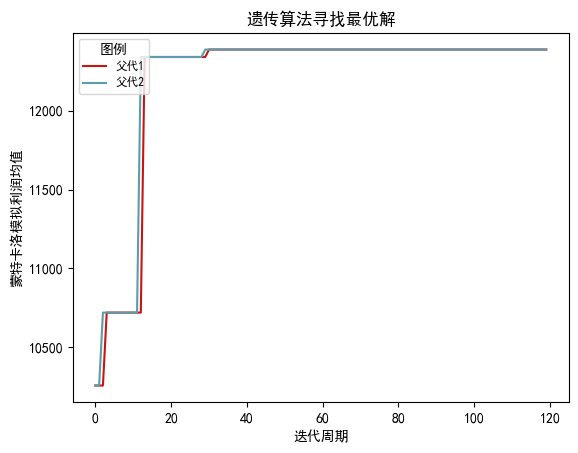

12388.0 12388.0
25 25


In [10]:
###画图
plt.plot(range(N),P1,color='#c71511',label='父代1')
plt.plot(range(N),P2,color='#5c9cad',label='父代2')
plt.xlabel('迭代周期')
plt.ylabel('蒙特卡洛模拟利润均值')
plt.title('遗传算法寻找最优解')
plt.legend(loc='upper left', fontsize='small', title='图例', shadow=False)
#plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

print(Pro1, Pro2)
print(indiv1, indiv2)